In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer=pd.read_csv('lung-cancer_data.csv',names=range(0,57),header=0)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2


In [3]:
df=pd.DataFrame(data=cancer)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
26,3,0,2,2,1,0,2,2,2,1,...,3,3,2,2,3,2,2,2,2,1
27,3,0,3,2,2,0,2,2,2,1,...,2,2,2,3,1,2,2,2,2,2
28,3,0,2,1,1,0,2,2,1,1,...,2,2,3,2,2,2,2,2,2,1
29,3,0,2,3,2,1,2,2,3,1,...,2,2,2,2,2,2,2,1,2,2
30,3,0,2,3,1,0,2,3,3,1,...,2,2,2,2,2,2,2,2,2,2


In [4]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56],
           dtype='int64')

In [5]:
df.shape

(31, 57)

In [6]:
df.dtypes

0      int64
1      int64
2      int64
3      int64
4     object
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31     int64
32     int64
33     int64
34     int64
35     int64
36     int64
37     int64
38    object
39     int64
40     int64
41     int64
42     int64
43     int64
44     int64
45     int64
46     int64
47     int64
48     int64
49     int64
50     int64
51     int64
52     int64
53     int64
54     int64
55     int64
56     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 57 columns):
0     31 non-null int64
1     31 non-null int64
2     31 non-null int64
3     31 non-null int64
4     31 non-null object
5     31 non-null int64
6     31 non-null int64
7     31 non-null int64
8     31 non-null int64
9     31 non-null int64
10    31 non-null int64
11    31 non-null int64
12    31 non-null int64
13    31 non-null int64
14    31 non-null int64
15    31 non-null int64
16    31 non-null int64
17    31 non-null int64
18    31 non-null int64
19    31 non-null int64
20    31 non-null int64
21    31 non-null int64
22    31 non-null int64
23    31 non-null int64
24    31 non-null int64
25    31 non-null int64
26    31 non-null int64
27    31 non-null int64
28    31 non-null int64
29    31 non-null int64
30    31 non-null int64
31    31 non-null int64
32    31 non-null int64
33    31 non-null int64
34    31 non-null int64
35    31 non-null int64
36    31 non-null int64
37    31

In [8]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
dtype: int64

In [9]:
df[[4,38]]=df[[4,38]].replace('?',nan)

In [10]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     3
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
dtype: int64

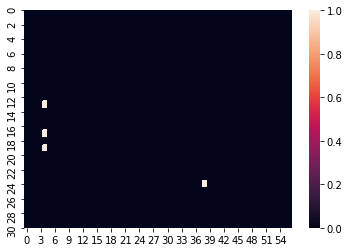

In [11]:
sns.heatmap(df.isnull())

In [12]:
df=df.dropna(axis=0,how='any')

In [13]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
dtype: int64

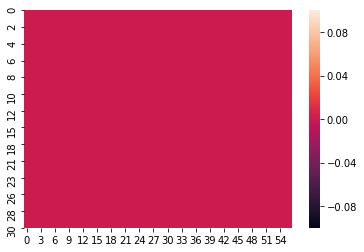

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.describe()

,0,1,2,3,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.037037,0.0,2.370370,2.296296,0.259259,2.259259,2.074074,2.407407,1.111111,1.370370,...,2.074074,2.074074,2.000000,2.037037,2.000000,1.888889,1.851852,1.592593,1.851852,1.703704
std,0.807726,0.0,0.564879,0.724028,0.446576,0.712125,0.780824,0.797074,0.423659,0.564879,...,0.266880,0.266880,0.392232,0.337580,0.480384,0.423659,0.456045,0.500712,0.362014,0.465322
min,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.0,2.000000,2.000000,0.000000,2.000000,1.500000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.0,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.0,3.000000,3.000000,0.500000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,0.0,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


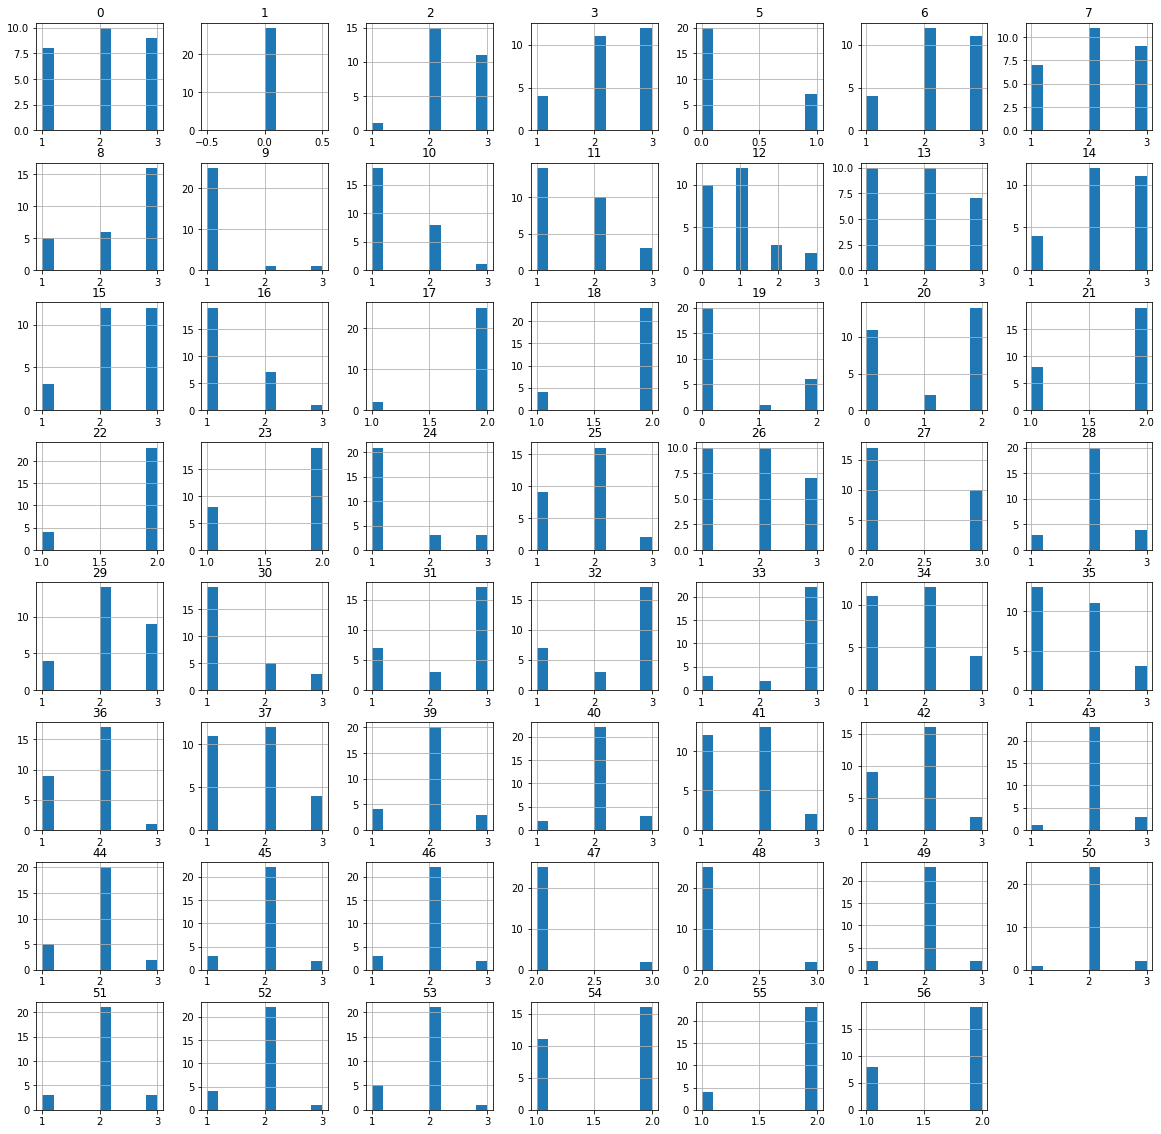

In [16]:
df.hist(figsize=(20,20))
plt.show()

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2


{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3d406548>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3d406fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee3d402e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3d40aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3d40afc8>],
 'means': []}

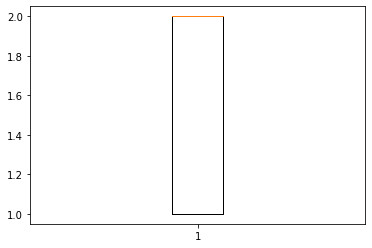

In [21]:
plt.boxplot(df[56])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ee3d435a88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ee3d42fa88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ee3d435d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ee3d435c48>}

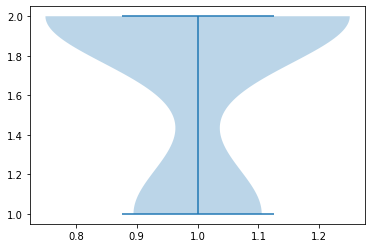

In [22]:
plt.violinplot(df[56])

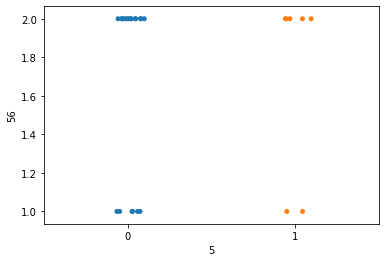

In [26]:
sns.stripplot(5,56,data=df)

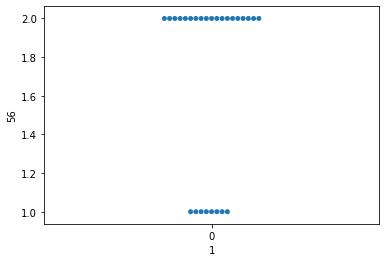

In [27]:
sns.swarmplot(1,56,data=df)

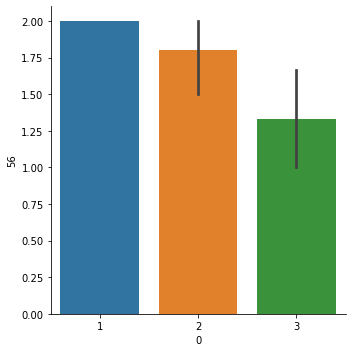

In [28]:
sns.catplot(0,56,data=df,kind='bar')

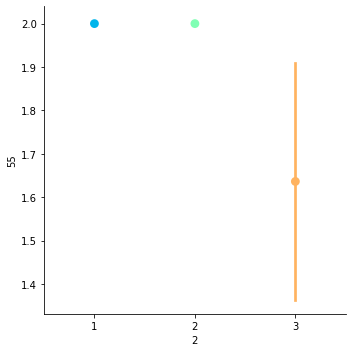

In [31]:
sns.catplot(2,55,data=df,palette='rainbow',kind='point')

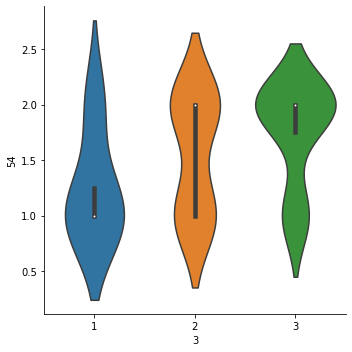

In [32]:
sns.catplot(3,54,data=df,kind='violin')

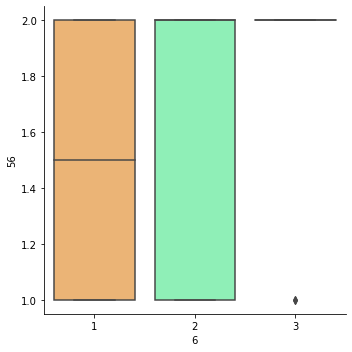

In [33]:
sns.catplot(6,56,data=df,palette='rainbow_r',kind='box')

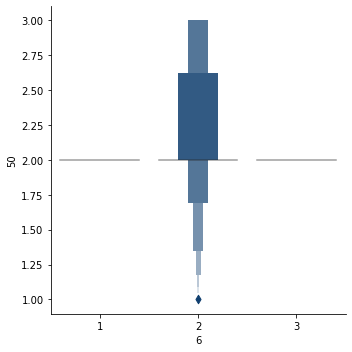

In [37]:
sns.catplot(6,50,data=df,palette='ocean_r',kind='boxen')

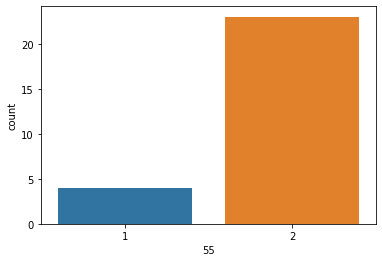

In [38]:
sns.countplot(df[55])

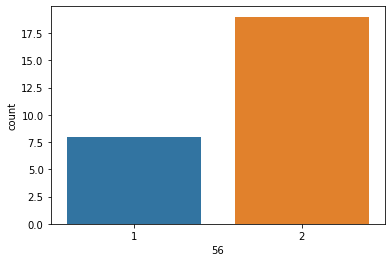

In [39]:
sns.countplot(df[56])

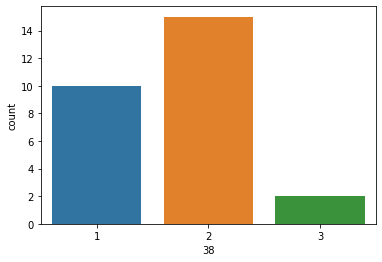

In [40]:
sns.countplot(df[38])

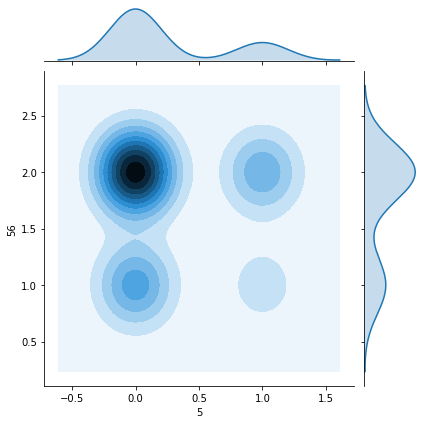

In [41]:
sns.jointplot(5,56,data=df,kind='kde')

In [19]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Int64Index([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
             35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
             53, 54, 55, 56],
            dtype='int64'), dtype('O'): Int64Index([4, 38], dtype='int64')}

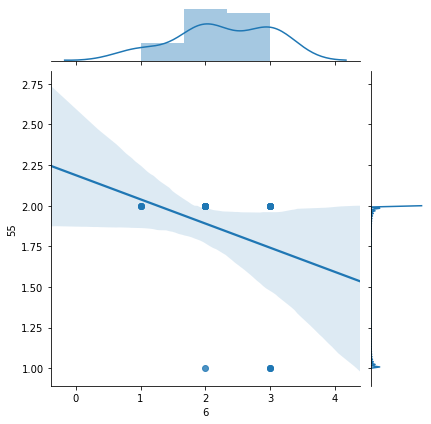

In [42]:
sns.jointplot(6,55,data=df,kind='reg')

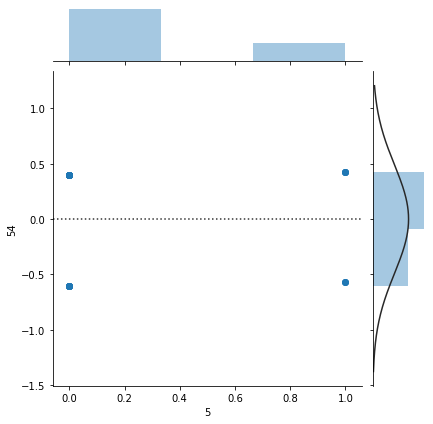

In [43]:
sns.jointplot(5,54,data=df,kind='reside')

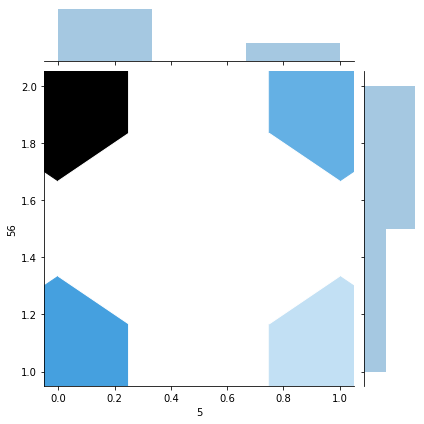

In [44]:
sns.jointplot(5,56,data=df,kind='hex')

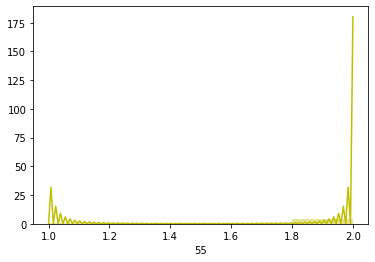

In [45]:
sns.distplot(df[55],color='y')

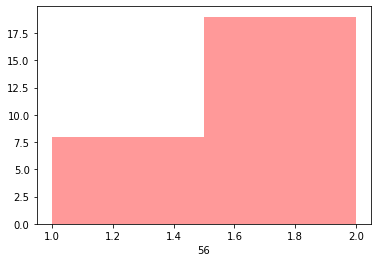

In [46]:
sns.distplot(df[56],color='r',kde=False)

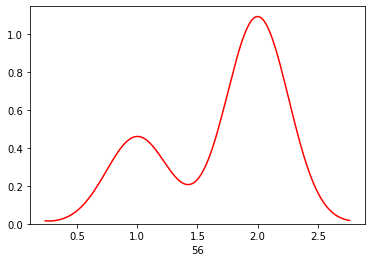

In [47]:
sns.distplot(df[56],color='r',hist=False)

In [17]:
df.shape

(27, 57)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2


In [19]:
x=df.iloc[:,0:-1]
x.shape

(27, 56)

In [20]:
pca=PCA(n_components=10)

In [21]:
y=df.iloc[:,-1]

In [22]:
x=pca.fit_transform(x)

In [23]:
x.shape

(27, 10)

In [24]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-1.883445,2.403431,-0.384070,-0.228049,-1.523597,0.421166,0.443774,-0.369186,1.432910,0.190153
1,-2.076735,-0.932871,0.872015,-0.331748,0.605238,-1.811574,1.182699,-1.246362,0.139853,-0.337049
2,-1.551021,-1.254875,2.802320,0.145325,0.732093,-1.204880,0.868724,0.069738,-0.000421,0.141243
3,-1.527341,1.825430,1.387405,-1.226965,-0.546270,0.910637,-1.249130,0.385455,0.554858,-0.630211
4,-2.146194,-1.735422,2.223684,-0.053019,-0.422815,0.456339,0.033604,-0.781168,0.394988,-1.272595
5,-2.583289,-2.053403,1.084581,-0.385409,0.169303,0.827218,-1.144371,-1.267898,-0.432026,0.877098
6,-2.355211,0.086181,-1.969236,-1.782191,-1.478992,1.434170,0.670310,1.688048,-0.553011,-1.263378
7,-2.463184,-0.101352,-2.585364,-0.689756,0.069462,1.361543,0.144358,-0.759021,-0.588704,1.182257
8,0.583611,-2.089869,0.031874,2.254510,-1.367166,-0.959184,-0.698504,2.174382,0.273106,0.656588
9,0.349994,-1.208040,-0.261175,-1.543254,1.678272,-0.385627,-0.702237,1.036775,-2.036378,-0.778830


In [25]:
x=df.iloc[:,0:-1]
x.shape

(27, 56)

In [26]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),MultinomialNB()]

In [27]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        acc_values=accuracy_score(y_test,predm)
        print('Accuracy score correspond to random state',r_state,'is:',acc_values)
        if acc_values>max_acc_score:
            max_acc_score=acc_values
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum accuracy score correspond to random state',final_state,'is',max_acc_score,'and modle is',final_model)

Accuracy score correspond to random state 40 is: 0.7142857142857143
Accuracy score correspond to random state 40 is: 0.7142857142857143
Accuracy score correspond to random state 40 is: 0.5714285714285714
Accuracy score correspond to random state 40 is: 0.8571428571428571
Accuracy score correspond to random state 41 is: 0.7142857142857143
Accuracy score correspond to random state 41 is: 0.8571428571428571
Accuracy score correspond to random state 41 is: 0.5714285714285714
Accuracy score correspond to random state 41 is: 0.8571428571428571
Accuracy score correspond to random state 42 is: 0.5714285714285714
Accuracy score correspond to random state 42 is: 0.5714285714285714
Accuracy score correspond to random state 42 is: 0.7142857142857143
Accuracy score correspond to random state 42 is: 0.7142857142857143
Accuracy score correspond to random state 43 is: 0.8571428571428571
Accuracy score correspond to random state 43 is: 0.7142857142857143
Accuracy score correspond to random state 43 is:

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=46)

In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1 0]
 [0 6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [30]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.66666667 1.         0.83333333 1.         0.75      ]
0.85
0.13333333333333333


In [31]:
from sklearn.externals import joblib

In [33]:
joblib.dump(knn,'LungCancerFile.obj')

['LungCancerFile.obj']